In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

from sklearn.preprocessing import LabelEncoder  


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import train_test_split



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

In [3]:
df = pd.read_csv('/Users/davidfernandez/Desktop/diamonds/train.csv')


In [4]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,4.82,2.98,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,5.18,3.22,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,5.90,3.69,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,6.48,3.96,8.726


## Second preprocessing 

### Outliers values management

In [8]:
df_numericas = df.select_dtypes(include=np.number)


# We first select only our numeric values

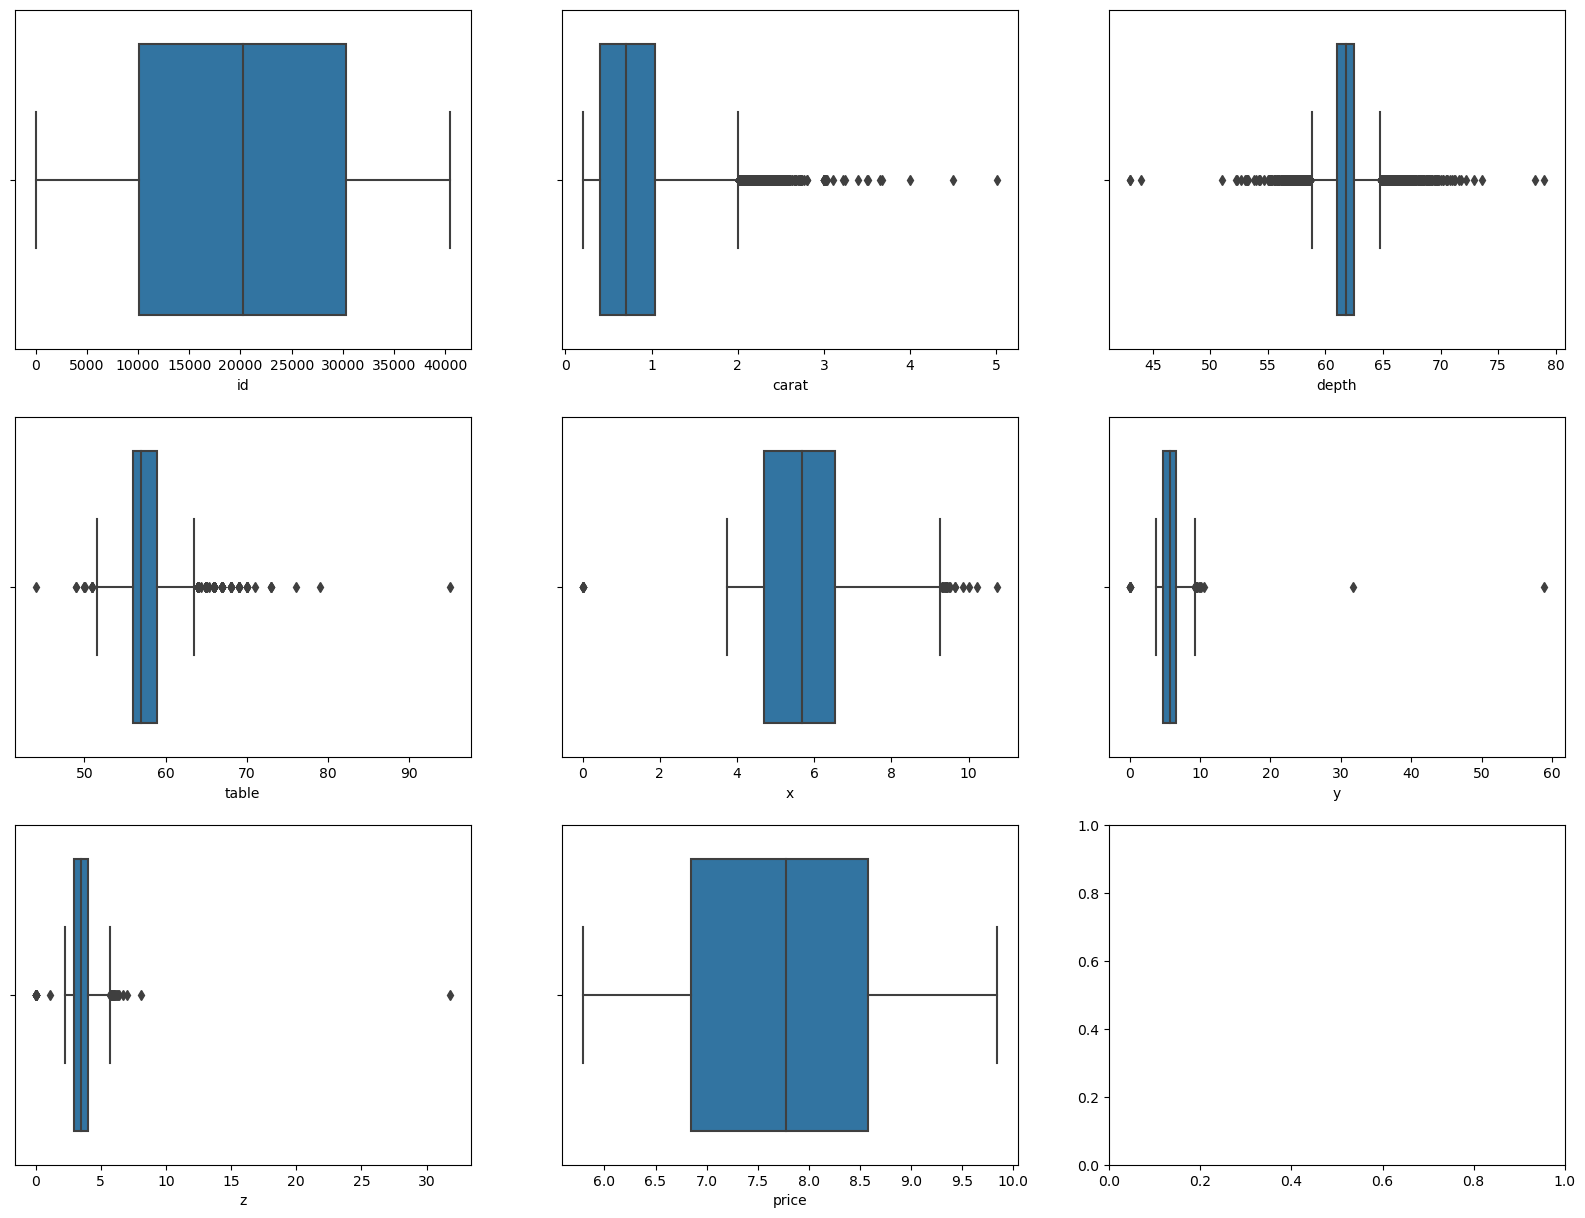

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=columna, data=df_numericas, ax=axes[indice])
plt.show()

# And now we visualize the outliers in our data

In [10]:
columns = ['y', 'z']
df = df.drop(columns, axis=1)

# In this combination, we're going to get rid of our 'y' and 'z' columns


In [12]:
df

,id,carat,cut,color,clarity,depth,table,x,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,6.588
...,...,...,...,...,...,...,...,...,...
40450,40450,0.42,Premium,D,SI2,62.1,59.0,4.78,6.551
40451,40451,0.53,Premium,G,VS2,62.0,58.0,5.21,7.382
40452,40452,0.80,Good,G,SI2,62.8,58.0,5.86,7.768
40453,40453,1.01,Very Good,F,VS2,61.5,57.0,6.40,8.726


### Encoding

In [15]:
from sklearn.preprocessing import OrdinalEncoder  


In [13]:
orden = ['Fair', 'Premium', 'Good', 'Very Good', 'Ideal']
orden1 = ['J', 'I', 'H', 'G', 'F', 'D', 'E'] 
orden2 = ['SI2', 'I1', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  

# We're going to use the same orders than before for our ordinal encoding for this combination

In [17]:
ordinal = OrdinalEncoder(categories=[orden], dtype=int)
df['cut_encoded'] = ordinal.fit_transform(df[['cut']])


In [18]:
ordinal = OrdinalEncoder(categories = [orden1], dtype = int)
df['color_encoded'] = ordinal.fit_transform(df[['color']])


In [19]:
ordinal = OrdinalEncoder(categories = [orden2], dtype = int)
df['clarity_encoded'] = ordinal.fit_transform(df[['clarity']])

In [20]:
df = df.drop(['cut', 'color', 'clarity'], axis=1)

In [23]:
df.to_csv('preprocessed1.csv', index=False)
